### 데이터 정보

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [2]:
df1 = pd.read_csv('heart.csv')
df2 = pd.read_csv('o2Saturation.csv')

In [3]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# 데이터 상단부 확인
df2.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
df=pd.merge(df1, df2, left_index=True, right_index=True) # csv 파일 두 개 합치기

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [7]:
# null 데이터 있는지 확인 > 없음
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
98.6        0
dtype: int64

In [8]:
# 데이터셋 열 이름 출력
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

### Data Preprocessing

In [9]:
# 데이터 columns 이름 보기 쉽게 변경
df.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral", 'cp':'Chest pain type',  'restecg':'Resting electrocardiographic results','thalachh':'Maximum heart rate','exng':'Exercise induced angina',
                        'oldpeak':'ST depression','slp':'slope of the peak exercise ST segment',
                       'caa':'No.of major vessels colored by flourosopy',
                   "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise"},inplace=True)

In [10]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 303 ,and number of columns are : 15


In [11]:
df.output.value_counts()
print('\n 0(심장 질환 가능성 < 50%):',df.output.value_counts()[0],"\n",
      '1(심장 질환 가능성 > 50%):',df.output.value_counts()[1])


 0(심장 질환 가능성 < 50%): 138 
 1(심장 질환 가능성 > 50%): 165


C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


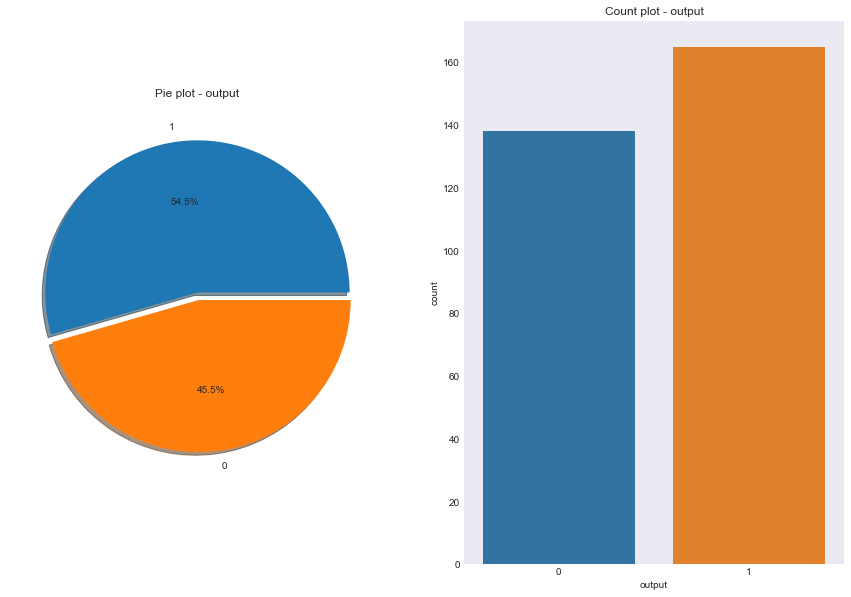

In [12]:
# EDA - 분석 목표(병 여부) 확인
f, ax = plt.subplots(1, 2, figsize=(15, 10))

df['output'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pie plot - output')
ax[0].set_ylabel('')
sns.countplot('output', data=df, ax=ax[1])
ax[1].set_title('Count plot - output')

plt.show()

In [13]:
df

,age,sex,Chest pain type,blood_pressure,Cholestoral,fasting_blood_sugar,Resting electrocardiographic results,max_heart_rate,exercise,ST depression,slope of the peak exercise ST segment,No.of major vessels colored by flourosopy,thall,output,o2Saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


In [14]:
df.fasting_blood_sugar.value_counts()
print(
    '\n Value 0: 공복 혈당 수치 > 120 mg/dl) (0 = false)',df.fasting_blood_sugar.value_counts()[0],"\n",
    'Value 1: 공복 혈당 수치 > 120 mg/dl) (1 = true)',df.fasting_blood_sugar.value_counts()[1],"\n",)


 Value 0: 공복 혈당 수치 > 120 mg/dl) (0 = false) 258 
 Value 1: 공복 혈당 수치 > 120 mg/dl) (1 = true) 45 



0    258
1     45
Name: fasting_blood_sugar, dtype: int64
----------------------------------------------------------------------------------------------------
258
45


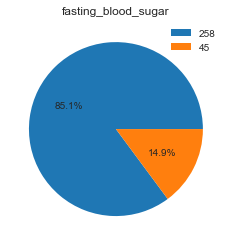

In [16]:
print(df.fasting_blood_sugar.value_counts())
print('-'*100)
print(df.fasting_blood_sugar.value_counts()[0])
print(df.fasting_blood_sugar.value_counts()[1])
index = [df.fasting_blood_sugar.value_counts()[0], df.fasting_blood_sugar.value_counts()[1]]
plt.title('fasting_blood_sugar')
# plt.pie(index, autopct='%1.1f%%')
df['fasting_blood_sugar'].value_counts().plot.pie(explode=[0, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
plt.pie(index, autopct='%1.1f%%')
# sns.countplot('fasting_blood_sugar', data=df, ax=ax[1])
plt.legend(index, loc='best')
plt.show()

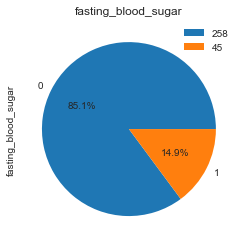

In [17]:
df['fasting_blood_sugar'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title('fasting_blood_sugar')
plt.legend(index, loc='best')
plt.show()

In [18]:
df.sex.value_counts()
print('\n 1 :',df.sex.value_counts()[0],"\n",
      '0 :',df.sex.value_counts()[1])


 1 : 96 
 0 : 207


In [19]:
index = [df.sex.value_counts()[0], df.sex.value_counts()[1]]

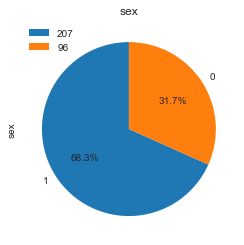

In [20]:
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('sex')
index = [df.sex.value_counts()[1], df.sex.value_counts()[0]]
plt.legend(index, loc='best')
plt.show()

In [21]:
# 1은 남자, 0은 여자로 정의
df.loc[(df['sex'] ==1), 'sex'] = 'Man'
df.loc[(df['sex'] ==0), 'sex'] = 'Woman'

df.loc[(df['output'] ==1), 'output'] = 'High'
df.loc[(df['output'] ==0), 'output'] = 'Low'

df.head()

,age,sex,Chest pain type,blood_pressure,Cholestoral,fasting_blood_sugar,Resting electrocardiographic results,max_heart_rate,exercise,ST depression,slope of the peak exercise ST segment,No.of major vessels colored by flourosopy,thall,output,o2Saturation
0,63,Man,3,145,233,1,0,150,0,2.3,0,0,1,High,98.6
1,37,Man,2,130,250,0,1,187,0,3.5,0,0,2,High,98.6
2,41,Woman,1,130,204,0,0,172,0,1.4,2,0,2,High,98.6
3,56,Man,1,120,236,0,1,178,0,0.8,2,0,2,High,98.1
4,57,Woman,0,120,354,0,1,163,1,0.6,2,0,2,High,97.5


In [29]:
df['Chest pain type'].value_counts()
print(
    '\n Value 0: typical angina(전형적 협심증)  =',df['Chest pain type'].value_counts()[0],"\n",
      'Value 1: atypical angina(비정형 협심증) =',df['Chest pain type'].value_counts()[1],"\n",
      'Value 2: non-anginal pain(협심증이 아닌 통증)=',df['Chest pain type'].value_counts()[2],"\n",
      'Value 3: asymptomatic(무증상)    =',df['Chest pain type'].value_counts()[3])


 Value 0: typical angina(전형적 협심증)  = 143 
 Value 1: atypical angina(비정형 협심증) = 50 
 Value 2: non-anginal pain(협심증이 아닌 통증)= 87 
 Value 3: asymptomatic(무증상)    = 23


In [30]:
df.columns

Index(['age', 'sex', 'Chest pain type', 'blood_pressure', 'Cholestoral',
       'fasting_blood_sugar', 'Resting electrocardiographic results',
       'max_heart_rate', 'exercise', 'ST depression',
       'slope of the peak exercise ST segment',
       'No.of major vessels colored by flourosopy', 'thall', 'output',
       'o2Saturation'],
      dtype='object')

In [31]:
print(df.cp.value_counts())
print(df.cp.value_counts()[0])
print(df.cp.value_counts()[1])
print(df.cp.value_counts()[2])
print(df.cp.value_counts()[3])
print('----------------------')
plt.subplots(figsize=(8,8))
sns.countplot(data=df,x='cp') #,palette="pastel"
plt.title( 'CP Count')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'cp'

In [35]:
df.thall.value_counts()
print(
    '\n Value 0: none  =',df.thall.value_counts()[0],"\n",
      'Value 1: fixed defect(고정적 결함)  =',df.thall.value_counts()[1],"\n",
      'Value 2: normal =',df.thall.value_counts()[2],"\n",
      'Value 3: reversable defect(가역적 결함)=',df.thall.value_counts()[3])


 Value 0: none  = 2 
 Value 1: fixed defect(고정적 결함)  = 18 
 Value 2: normal = 166 
 Value 3: reversable defect(가역적 결함)= 117


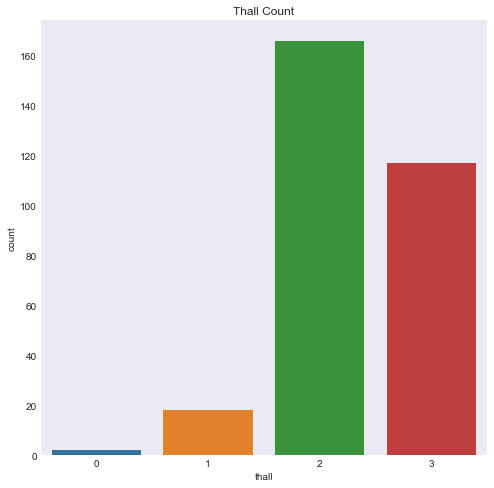

In [36]:
plt.subplots(figsize=(8,8))
sns.countplot(data=df,x='thall')
plt.title( 'Thall Count')
plt.show()

ValueError: Could not interpret input 'slope_of_the_peak_exercise_ST_segment'

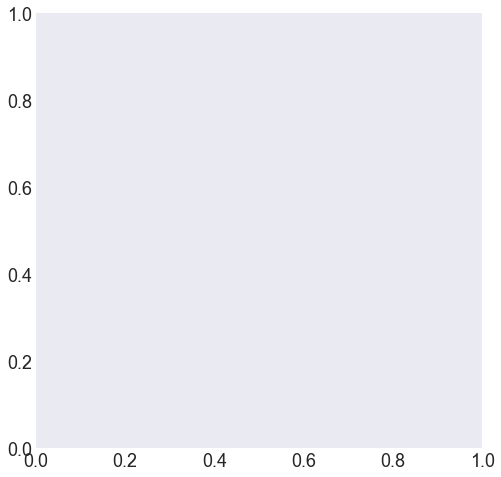

In [40]:
plt.subplots(figsize=(8,8))
sns.countplot(data=df,x='slope_of_the_peak_exercise_ST_segment')
plt.title( 'slp Count')
plt.show()

In [15]:
# 데이터 columns 이름 보기 쉽게 변경
df.rename(columns={"98.6":"o2Saturation","trtbps":"blood_pressure","chol":"Cholestoral", 'cp':'Chest_pain_type',  
                   'restecg':'Resting_electrocardiographic_results','thalachh':'Maximum_heart_rate','exng':'Exercise_induced angina',
                        'oldpeak':'ST_depression','slp':'slope_of_the_peak_exercise_ST_segment',
                       'caa':'No.of major vessels colored by flourosopy',
                   "fbs":"fasting_blood_sugar","thalachh":"max_heart_rate","exng":"exercise"},inplace=True)

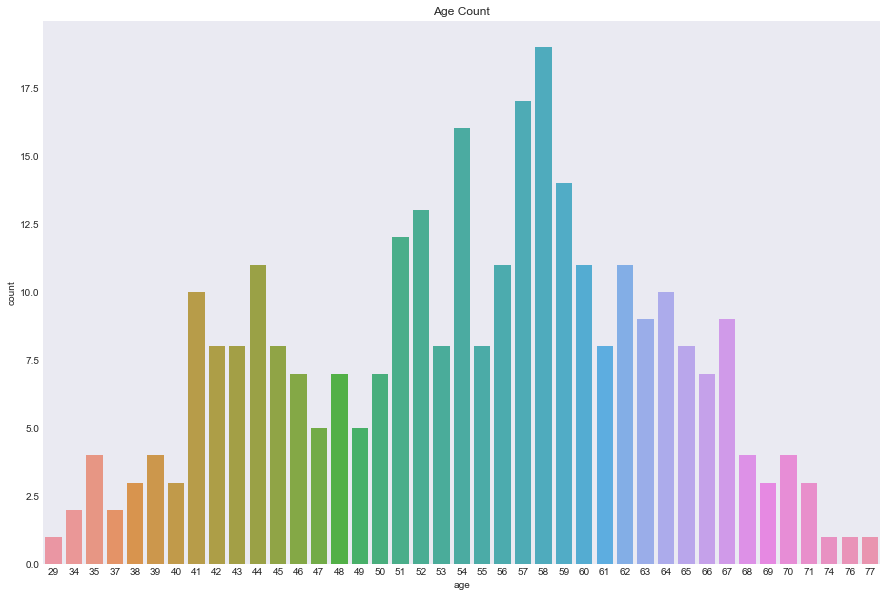

In [38]:
plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='age')
plt.title( 'Age Count')
plt.show()

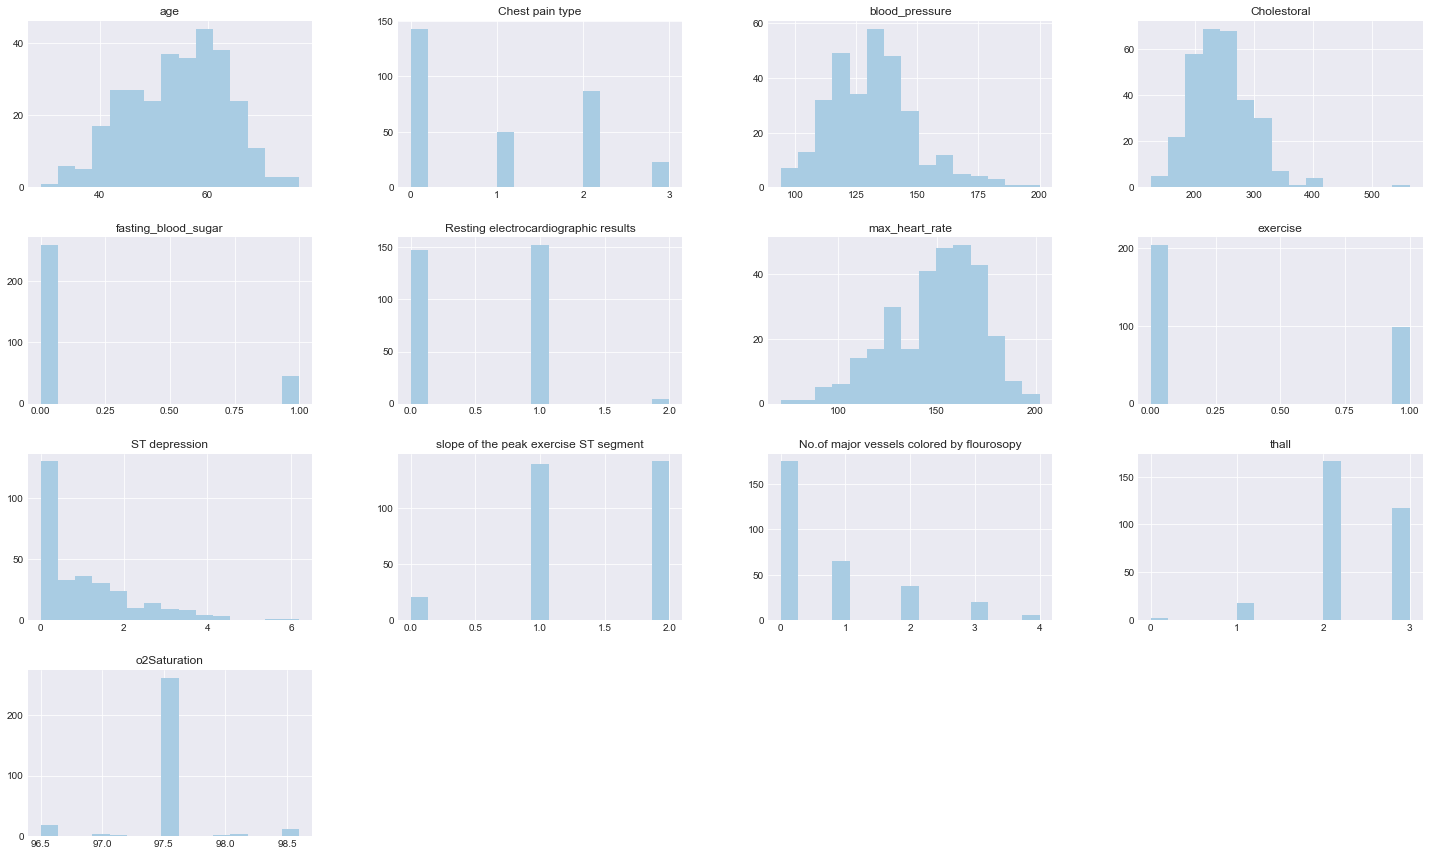

In [39]:
color = '#a9cce3'
df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

In [ ]:
df.corr()

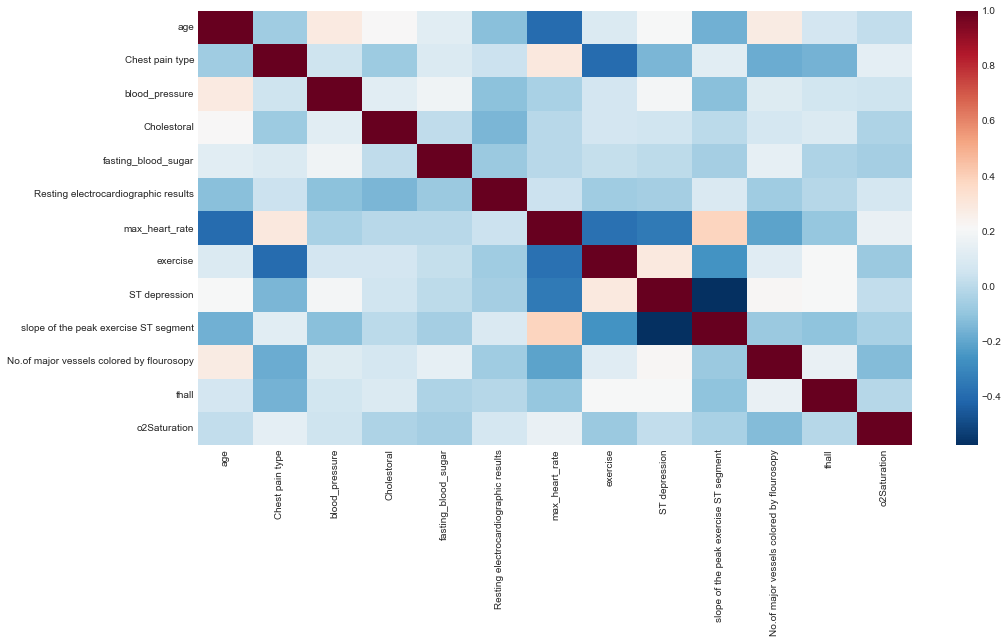

In [34]:
plt.figure(figsize= (16, 8))
# sns.heatmap(df.corr(), annot = True, cmap= 'RdBu_r', fmt= '.1f');
sns.heatmap(df.corr(), cmap= 'RdBu_r');

In [ ]:
categorical_list = ["sex", "cp","fasting_blood_sugar","restecg","exercise","slp","caa","max_heart_rate","output"]

In [ ]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figsize=(15,15)
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

### Decision Tree Algorithm

In [ ]:
new_columns = ["age", "sex", "Chest pain type", "blood_pressure", "Cholestoral", "fbs", "Resting electrocardiographic results", 
               "max_heart_rate", "Exercise induced angina", "ST depression", "slope of the peak exercise ST segment", 
               "No.of major vessels colored by flourosopy", "thal", "target", "o2Saturation"]

In [ ]:
df.columns = new_columns

In [ ]:
df.head()

In [ ]:
print("Shape of Dataset:", df.shape)

In [ ]:
df.info()

In [ ]:
df=pd.merge(df1, df2, left_index=True, right_index=True) # csv 파일 두 개 합치기

In [ ]:
df

In [ ]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]
df

In [ ]:
df[numeric_var].describe()

In [ ]:
numeric_var

In [ ]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [ ]:
list(zip(numeric_var, numeric_axis_name))

In [ ]:
categoric_var

In [ ]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [ ]:
df[df["thalachh"] == 0]

In [ ]:
numeric_var.append("target")

In [ ]:
numeric_var